# Problem Set 7

**Mingqi Sui, Diana Zhang, Tong Liu, Valentina Cortés, Edoardo Pettinato**

**Group 9 - Cohort 1**

***

## Part(1)

In [3]:
import pandas as pd

# Load the file 
file_path = r'C:\Users\76721\Desktop\UCLA\Fall-2024\Investments\Lecture 7\lecture6p_2022.xlsx'

data = pd.ExcelFile(file_path)

# Extract the sheet names of the file
data.sheet_names


['MSFT', 'INTC', 'LUV', 'MCD', 'JNJ', 'F-F_Research_Data_Factors_daily']

In [4]:
# Load the data based on the sheet name
msft = data.parse('MSFT')
intc = data.parse('INTC')
luv = data.parse('LUV')
mcd = data.parse('MCD')
jnj = data.parse('JNJ')

msft.head()



,Date,Open,High,Low,Close,AdjClose,Volume
0,1989-12-29,0.593750,0.612847,0.592014,0.604167,0.382122,77630400
1,1990-01-02,0.605903,0.616319,0.598090,0.616319,0.389807,53035200
2,1990-01-03,0.621528,0.626736,0.614583,0.619792,0.392004,113774400
3,1990-01-04,0.619792,0.638889,0.616319,0.638021,0.403533,125740800
4,1990-01-05,0.635417,0.638889,0.621528,0.622396,0.393651,69566400


In [5]:
# weekly return function definition
def calculate_weekly_return(stock_data, column = 'AdjClose'):
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.set_index('Date',inplace = True)
    weekly_data = stock_data[column].resample('W-FRI').last()
    weekly_return = weekly_data.pct_change().dropna()
    return weekly_return 

# Calculate weekly return 
weekly_returns = {
    'MSFT':calculate_weekly_return(msft),
    'INTC':calculate_weekly_return(intc),
    'LUV':calculate_weekly_return(luv),
    'MCD':calculate_weekly_return(mcd),
    'JNJ':calculate_weekly_return(jnj)
}

weekly_return_all = pd.DataFrame(weekly_returns)
weekly_mean = weekly_return_all.mean()
weekly_sd = weekly_return_all.std()

# Correlation Matrix
weekly_correlation = weekly_return_all.corr()

print("Mean of weekly return is:\n" + weekly_mean.to_string())
print("\nStandard Deviation of weekly return is:\n" + weekly_sd.to_string())
print("\nCorrelation matrix of weekly return:\n" + weekly_correlation.to_string())

Mean of weekly return is:
MSFT    0.004655
INTC    0.003487
LUV     0.003286
MCD     0.002819
JNJ     0.002631

Standard Deviation of weekly return is:
MSFT    0.040559
INTC    0.048813
LUV     0.047662
MCD     0.030900
JNJ     0.028112

Correlation matrix of weekly return:
          MSFT      INTC       LUV       MCD       JNJ
MSFT  1.000000  0.497745  0.296279  0.290505  0.288351
INTC  0.497745  1.000000  0.292644  0.255923  0.208963
LUV   0.296279  0.292644  1.000000  0.308490  0.249036
MCD   0.290505  0.255923  0.308490  1.000000  0.318710
JNJ   0.288351  0.208963  0.249036  0.318710  1.000000


In [6]:
# yearly return function definition
def calculate_yearly_return(stock_data, column = 'AdjClose'):
    yearly_data = stock_data[column].resample('YE').last()
    yearly_return = yearly_data.pct_change().dropna()
    return yearly_return 

# Calculate weekly return 
yearly_returns = {
    'MSFT':calculate_yearly_return(msft),
    'INTC':calculate_yearly_return(intc),
    'LUV':calculate_yearly_return(luv),
    'MCD':calculate_yearly_return(mcd),
    'JNJ':calculate_yearly_return(jnj)
}

yearly_return_all = pd.DataFrame(yearly_returns)
yearly_mean = yearly_return_all.mean()
yearly_sd = yearly_return_all.std()

# Correlation Matrix
yearly_correlation = yearly_return_all.corr()

print("Mean of yearly return is:\n"+yearly_mean.to_string())
print("\nStandard Deviation of yearly return is:\n"+yearly_sd.to_string())
print("\nCorrelation matrix of yearly return:\n"+yearly_correlation.to_string())


Mean of yearly return is:
MSFT    0.290415
INTC    0.192399
LUV     0.193800
MCD     0.151882
JNJ     0.134532

Standard Deviation of yearly return is:
MSFT    0.408735
INTC    0.410815
LUV     0.448003
MCD     0.230569
JNJ     0.174752

Correlation matrix of yearly return:
          MSFT      INTC       LUV       MCD       JNJ
MSFT  1.000000  0.508550  0.104293  0.238358  0.634461
INTC  0.508550  1.000000  0.295793  0.474056  0.228505
LUV   0.104293  0.295793  1.000000  0.085148  0.343884
MCD   0.238358  0.474056  0.085148  1.000000  0.258915
JNJ   0.634461  0.228505  0.343884  0.258915  1.000000


# Part(2)

Minimum-variance portfolio weights:
 [0.67932924 0.32067076]


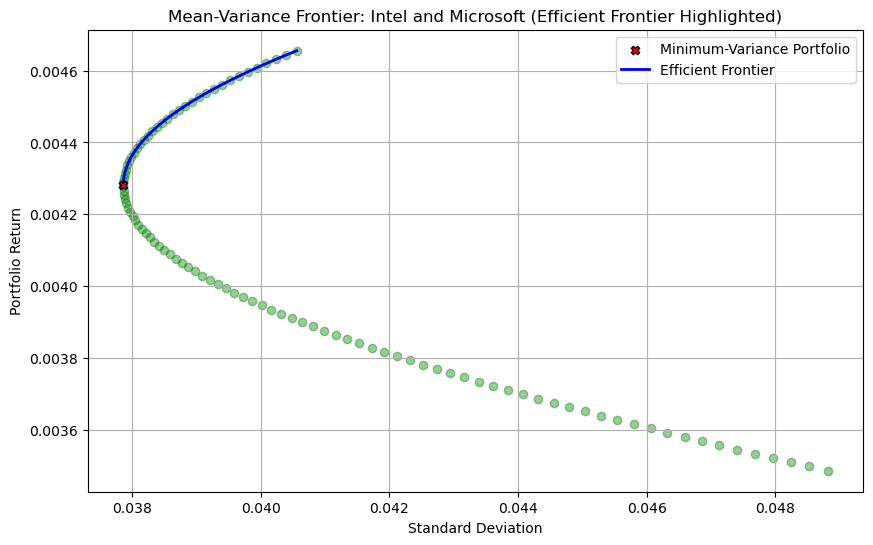

In [72]:
# Since Weekly return is more high-frequency data, using weekly data for future parts
# Load library
import numpy as np
import matplotlib.pyplot as plt

# Extract weekly return 
msft_returns = weekly_return_all['MSFT']
intc_returns = weekly_return_all['INTC']

expected_returns = np.array([msft_returns.mean(),intc_returns.mean()])
ms_int_cov = weekly_return_all[['MSFT','INTC']].cov().values

# Define portfolio weights 
def portfolio_metrics(weights, expected_returns, cov_matrix):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return portfolio_return, np.sqrt(portfolio_variance)

# Generate weights for the assests in the portfolio
weights = np.linspace(0,1,100)
portfolio_returns = []
portfolio_sd = []

for i in weights:
    weight_vec = np.array([i, 1 - i])
    ret,sd = portfolio_metrics(weight_vec,expected_returns, ms_int_cov)
    portfolio_returns.append(ret)
    portfolio_sd.append(sd)

# Convert to arrays for plotting
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_sd)

# Find the minimum-variance portfolio
min_var_idx = np.argmin(portfolio_risks)
min_var_return = portfolio_returns[min_var_idx]
min_var_risk = portfolio_risks[min_var_idx]

#---- old part------
inv_cov_matrix = np.linalg.inv(ms_int_cov)
ones = np.ones(len(expected_returns))
min_var_weights = np.dot(inv_cov_matrix, ones)/np.dot(ones.T, np.dot(inv_cov_matrix, ones))
min_var_return, min_sd = portfolio_metrics(min_var_weights,expected_returns, ms_int_cov)

# Identify the efficient frontier (portfolios with the highest return for a given risk level)
efficient_frontier_idx = np.argsort(portfolio_risks)
efficient_risks = portfolio_risks[efficient_frontier_idx]
efficient_returns = portfolio_returns[efficient_frontier_idx]

# Determine the cutoff for the efficient frontier (where returns are non-decreasing with risk)
efficient_mask = efficient_returns == np.maximum.accumulate(efficient_returns)
efficient_risks = efficient_risks[efficient_mask]
efficient_returns = efficient_returns[efficient_mask]

print("Minimum-variance portfolio weights:\n",min_var_weights)
# Plot the mean-variance frontier with the efficient frontier highlighted
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_risks, portfolio_returns, marker='o', color = 'green', alpha=0.4)
plt.scatter(min_var_risk, min_var_return, color='red', label='Minimum-Variance Portfolio', edgecolors='black', zorder=5,marker='X')
plt.plot(efficient_risks, efficient_returns, color='blue', linewidth=2, label='Efficient Frontier')
plt.title('Mean-Variance Frontier: Intel and Microsoft (Efficient Frontier Highlighted)')
plt.xlabel('Standard Deviation')
plt.ylabel('Portfolio Return')
plt.legend()
plt.grid(True)
plt.show()


## Part(3)

Minimum-variance portfolio weights:
 [0.10233971 0.05279522 0.05534055 0.32722465 0.46229987]


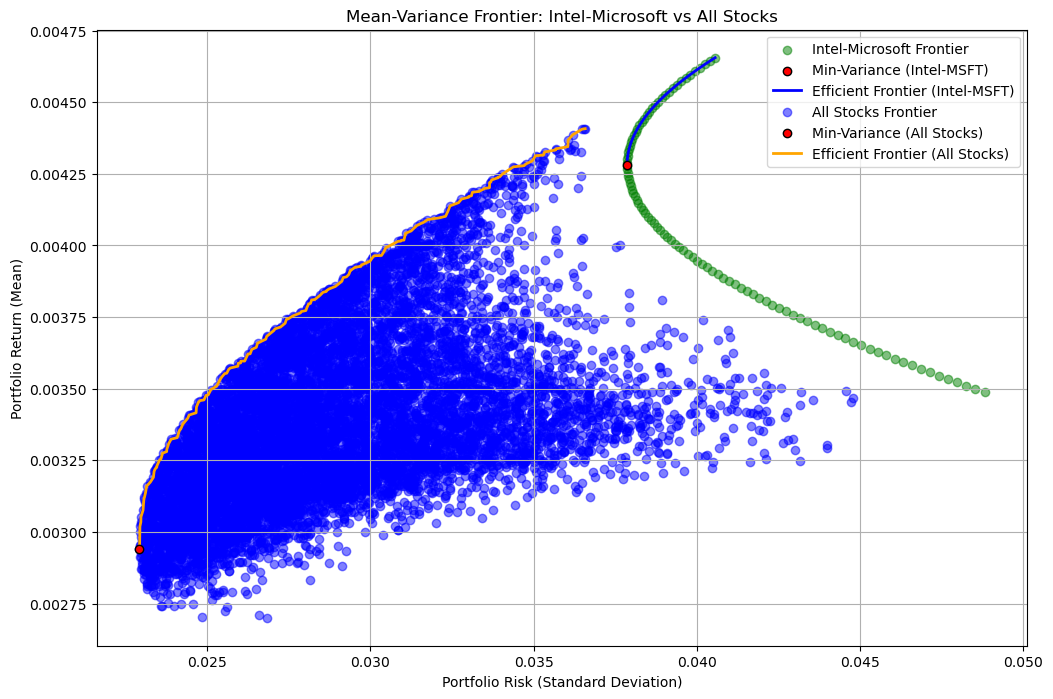

In [74]:
# Extract weekly return 
full_expected_returns = weekly_return_all.mean().values
full_cov_matrix = weekly_return_all.cov().values

# Define portfolio weights 
def portfolio_metrics(weights, expected_returns, cov_matrix):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return portfolio_return, np.sqrt(portfolio_variance)

# Generate weights for the assests in the portfolio
n_portfolios = 10000
#np.random.seed(42)
random_weights = np.random.dirichlet(np.ones(5), size = n_portfolios)

# Calculate the portfolio returns and std
port_returns_full = []
port_std_full = []

for i in random_weights:
    ret,sd = portfolio_metrics(i,full_expected_returns,full_cov_matrix)
    port_returns_full.append(ret)
    port_std_full.append(sd)


#---OLD PART--------------------------
inv_full_cov_matrix = np.linalg.inv(full_cov_matrix)
ones_full = np.ones(len(full_expected_returns))
min_var_weights_full = np.dot(inv_full_cov_matrix, ones_full)/np.dot(ones_full.T, np.dot(inv_full_cov_matrix, ones_full))
min_var_return_full, min_std_full = portfolio_metrics(min_var_weights_full,full_expected_returns, full_cov_matrix)


# Convert to arrays
portfolio_returns_all = np.array(port_returns_full)
portfolio_risks_all = np.array(port_std_full)

# Find the minimum-variance portfolio for all stocks
min_var_idx_all = np.argmin(portfolio_risks_all)
min_var_return_all = portfolio_returns_all[min_var_idx_all]
min_var_risk_all = portfolio_risks_all[min_var_idx_all]

# Identify the efficient frontier for all stocks
efficient_frontier_idx_all = np.argsort(portfolio_risks_all)
efficient_risks_all = portfolio_risks_all[efficient_frontier_idx_all]
efficient_returns_all = portfolio_returns_all[efficient_frontier_idx_all]
efficient_mask_all = efficient_returns_all == np.maximum.accumulate(efficient_returns_all)
efficient_risks_all = efficient_risks_all[efficient_mask_all]
efficient_returns_all = efficient_returns_all[efficient_mask_all]

print("Minimum-variance portfolio weights:\n",min_var_weights_full)
plt.figure(figsize=(12, 8))

# Intel-Microsoft
plt.scatter(portfolio_risks, portfolio_returns, color = 'green', marker='o', alpha=0.5, label='Intel-Microsoft Frontier')
plt.scatter(min_var_risk, min_var_return, color='red', label='Min-Variance (Intel-MSFT)', edgecolors='black', zorder=5)
plt.plot(efficient_risks, efficient_returns, color='blue', linewidth=2, label='Efficient Frontier (Intel-MSFT)')

# All stocks
plt.scatter(portfolio_risks_all, portfolio_returns_all, color = 'blue', marker='o', alpha=0.5, label='All Stocks Frontier')
plt.scatter(min_var_risk_all, min_var_return_all, color='red', label='Min-Variance (All Stocks)', edgecolors='black', zorder=5)
plt.plot(efficient_risks_all, efficient_returns_all, color='orange', linewidth=2, label='Efficient Frontier (All Stocks)')

# Formatting
plt.title('Mean-Variance Frontier: Intel-Microsoft vs All Stocks')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return (Mean)')
plt.legend()
plt.grid(True)
plt.show()


The inclusion of more stocks in the portfolio has shift the portfolio frontier to the left, especailly towards higher returns and lower risks, showing better effects of diversification.
Also, the efficient frontier of all stocks dominates the Intel-Microsoft frontier, offering better return with smaller risk.

## Part(4)

In [66]:
# Load risk-free data
risk_free_data = data.parse('F-F_Research_Data_Factors_daily')

daily_rf = risk_free_data['RF'].mean() / 100 # convert % to decimal
weekly_rf = ((1+daily_rf)**5)- 1 # convert daily to weekly



# Function to calculate tangent portfolio weights and Sharpe ratio
def calculate_tangent_portfolio(expected_returns, cov_matrix, risk_free_rate):
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    excess_returns = expected_returns - risk_free_rate
    tangent_weights = np.dot(inv_cov_matrix, excess_returns)/np.dot(np.ones(len(expected_returns)).T, np.dot(inv_cov_matrix,excess_returns))
    tangent_return = np.dot(tangent_weights, expected_returns)
    tangent_risk = np.sqrt(np.dot(tangent_weights.T, np.dot(cov_matrix, tangent_weights)))
    sharpe_ratio = (tangent_return - risk_free_rate) / tangent_risk
    return tangent_weights, tangent_return, tangent_risk, sharpe_ratio

# Calculate tangent portfolio for Intel-Microsoft
tangent_weights_intc_msft, tangent_return_intc_msft, tangent_risk_intc_msft, sharpe_ratio_intc_msft = calculate_tangent_portfolio(expected_returns,
                                                                                                                                  ms_int_cov,
                                                                                                                                  weekly_rf)
# Calculate tangent portfolio for all stocks
tangent_weights_full, tangent_return_full, tangent_risk_full, sharpe_ratio_full = calculate_tangent_portfolio(full_expected_returns,
                                                                                                              full_cov_matrix,
                                                                                                              weekly_rf)
                                                                                                               
results_tangent = pd.DataFrame({
  'Portfolio':['Intel-Microsoft','All stocks'],
  'Tangent Return':[tangent_return_intc_msft, tangent_return_full],
    'Tangent Risk':[tangent_risk_intc_msft, tangent_risk_full],
    'Sharpe Ratio':[sharpe_ratio_intc_msft, sharpe_ratio_full]
})

results_tangent

,Portfolio,Tangent Return,Tangent Risk,Sharpe Ratio
0,Intel-Microsoft,0.004532,0.039097,0.103309
1,All stocks,0.003521,0.025232,0.120017


The **Tangent Return** and **Tangent Risk** for intel-Microsoft is higher and lower than All stocks, which seems a trade-off between higher return and risks.

But, the **Sharpe Ratio** is higher for All stocks compared with intel-Microsoft, indicating this diversification takes better return over per unit of risk.

## Part(5)

In [76]:
# Define the risk-aversion 
A = 3.5

# Calculate overall wealth allocated to the tangent portfolio
w_p_intc_msft = (tangent_return_intc_msft - weekly_rf) / (A * (tangent_risk_intc_msft ** 2))
# Asset allocation in Intel-Microsoft porfolio
optimal_weights_intc_msft = w_p_intc_msft * tangent_weights_intc_msft

# Calculate overall wealth allocated to the tangent portfolio
w_p_full = (tangent_return_full - weekly_rf)/(A * (tangent_risk_full ** 2))
# Asset allocation in All stocks porfolio
optimal_weights_full = w_p_full * tangent_weights_full

# Combine with risk-free asset
optimal_portfolio = pd.DataFrame({
    'Portfolio':['Intel-Microsoft','All stocks'],
    'Risk-free asset': [1 - w_p_intc_msft, 1 - w_p_full],
    'Portfolio Allocation':[w_p_intc_msft, w_p_full]
})
# Create a DataFrame showing the weights of each asset in the optimal portfolio
assets = weekly_return_all.columns.tolist()

# Weights for Intel-Microsoft portfolio
weights_intc_msft = pd.DataFrame({
    'Asset': ['MSFT', 'INTC'],
    'Weight': optimal_weights_intc_msft
})

# Weights for the full-stock portfolio
weights_full = pd.DataFrame({
    'Asset': assets,
    'Weight': optimal_weights_full
})

print("Intel-Microsoft Asset Allocation:\n", weights_intc_msft,"\n")
print("All stocks Asset Allocation:\n",weights_full)
optimal_portfolio

Intel-Microsoft Asset Allocation:
   Asset    Weight
0  MSFT  0.675163
1  INTC  0.079806 

All stocks Asset Allocation:
   Asset    Weight
0  MSFT  0.532556
1  INTC  0.012200
2   LUV  0.089375
3   MCD  0.331546
4   JNJ  0.393319


,Portfolio,Risk-free asset,Portfolio Allocation
0,Intel-Microsoft,0.245032,0.754968
1,All stocks,-0.358996,1.358996


The optimal mix of assets with risk aversion A = 3.5 is calculated:   

1. Intel-Microsoft:
- 75.5% of wealth should be invested in Intel-Microsoft tangent portfolio
- 24.5% of wealth should be invested in risk-free asset
 
2. All stocks:
- Borrow(35.9%) to invest 135.9% of wealth into the all-stocks tangent portfolio.
- Negative portfolio weights indicates borrowing money at risk free rate. 